# Sentiment Analysis for Customer Reviews Challenge

## Challenge:
Develop a robust Sentiment Analysis classifier for XYZ customer reviews, automating the categorization into positive, negative, or neutral sentiments. Utilize Natural Language Processing (NLP) techniques, exploring different sentiment analysis methods.

## Problem Statement:
XYZ organization, a global online retail giant, accumulates a vast number of customer reviews daily. Extracting sentiments from these reviews offers insights into customer satisfaction, product quality, and market trends. The challenge is to create an effective sentiment analysis model that accurately classifies XYZ customer reviews.

### Important Instructions:

1. Make sure this ipynb file that you have cloned is in the __Project__ folder on the Desktop. The Dataset is also available in the same folder.
2. Ensure that all the cells in the notebook can be executed without any errors.
3. Once the Challenge has been completed, save the SentimentAnalysis.ipynb notebook in the __*Project*__ Folder on the desktop. If the file is not present in that folder, autoevalution will fail.
4. Print the evaluation metrics of the model. 
5. Before you submit the challenge for evaluation, please make sure you have assigned the Accuracy score of the model that was created for evaluation.
6. Assign the Accuracy score obtained for the model created in this challenge to the specified variable in the predefined function *submit_accuracy_score*. The solution is to be written between the comments `# code starts here` and `# code ends here`
7. Please do not make any changes to the variable names and the function name *submit_accuracy_score* as this will be used for automated evaluation of the challenge. Any modification in these names will result in unexpected behaviour.

### --------------------------------------- CHALLENGE CODE STARTS HERE --------------------------------------------

In [1]:
## import all the necessary libraries
import warnings
warnings.filterwarnings("ignore")                   
import numpy as np                                
import pandas as pd                              
import nltk

In [4]:
##reading dataset
data = pd.read_csv("Reviews.csv")
print(data.shape)
data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Data Preprocessing

In [5]:
## add some columns for upvote metrics
data['Helpful %'] = np.where(data['HelpfulnessDenominator'] > 0, data['HelpfulnessNumerator'] / data['HelpfulnessDenominator'], -1)

In [6]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [7]:
data['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [8]:
data['%upvote'] = pd.cut( data['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty','0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [9]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [10]:
data.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [11]:
data_group=data.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
data_group

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [12]:
pivot=data_group.pivot(index='%upvote',columns='Score')
pivot

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

In [13]:
import seaborn as sb

<Axes: xlabel='None-Score', ylabel='%upvote'>

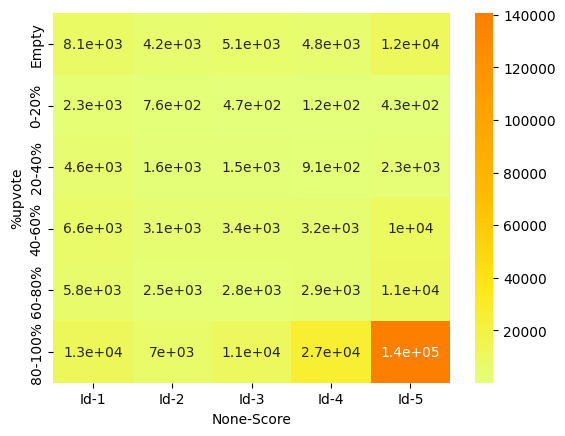

In [14]:
sb.heatmap(pivot,annot=True,cmap='Wistia')

In [18]:
data2=data[data['Score']!=3]
data2.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

###Getting X and y for model training

> Indented block



In [19]:
#turning into classification problem(0,1)
dict={1:0,2:0,4:1,5:1}
y=data2['Score'].map(dict)
y  

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 525814, dtype: int64

In [20]:
X=data2['Text']

### CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(stop_words = 'english')

In [22]:
traindata= cv.fit_transform(X)

In [23]:
traindata.shape[1]

114969

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traindata, y, test_size=0.33, random_state=42)

In [25]:
X_train.shape[1]

114969

In [26]:
print("X_train {}".format(X_train.shape[0]),"y_train {}".format(y_train.shape[0]))
print("X_test {}".format(X_test.shape[0]),"y_test {}".format(y_test.shape[0]))

X_train 352295 y_train 352295
X_test 173519 y_test 173519
